In [1]:
library(dplyr)
library(ggplot2)
library(zoo)
library(forecast)
library(TSA)
library(uroot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



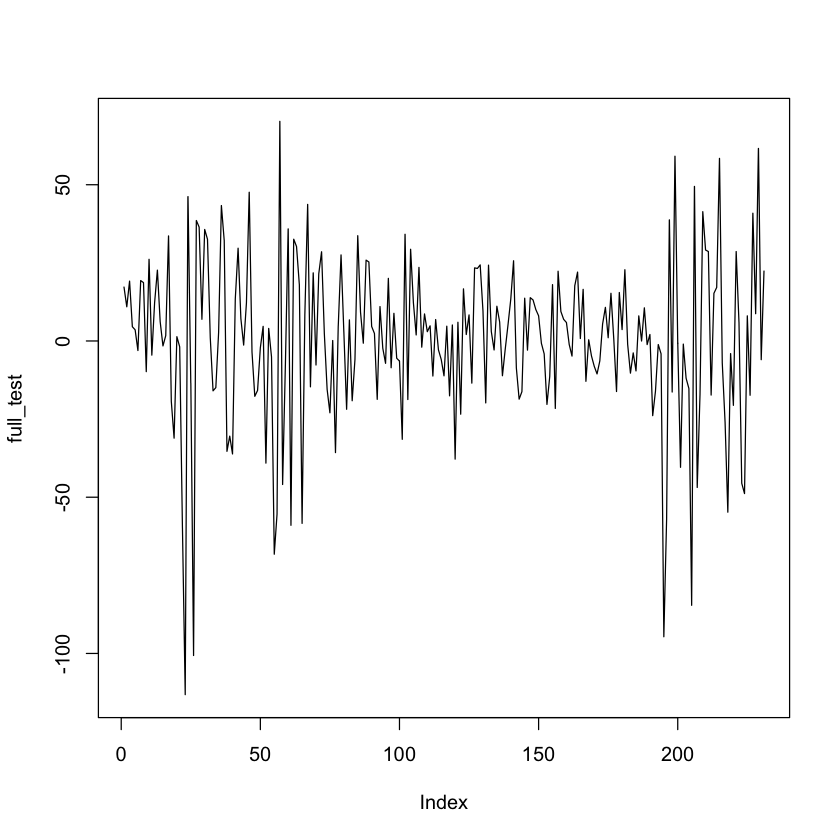

In [2]:
# Create our SARIMA(8,1,1,0) Model
sp <- read.csv("full_data.csv")
sp$Date <- as.Date(sp$Date, "%Y-%m-%d")
full_test <- ts(sp$Close)
full_test <- diff(sp$Close, differences=1)
plot(full_test, type = 'l')

In [3]:
#seperate data into train and test subsets
actual=window(full_test,start=213); 
series=window(full_test,end=212)
auto.arima(series) 
model=arima(series,order = c(8,0,0)); model

Series: series 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 675.6:  log likelihood=-991.47
AIC=1984.95   AICc=1984.97   BIC=1988.31


Call:
arima(x = series, order = c(8, 0, 0))

Coefficients:
          ar1      ar2     ar3      ar4      ar5      ar6     ar7      ar8
      -0.0053  -0.1064  0.1545  -0.0231  -0.0076  -0.0934  0.0682  -0.2101
s.e.   0.0672   0.0672  0.0677   0.0689   0.0685   0.0683  0.0683   0.0701
      intercept
         0.1032
s.e.     1.4033

sigma^2 estimated as 615.3:  log likelihood = -981.82,  aic = 1981.64

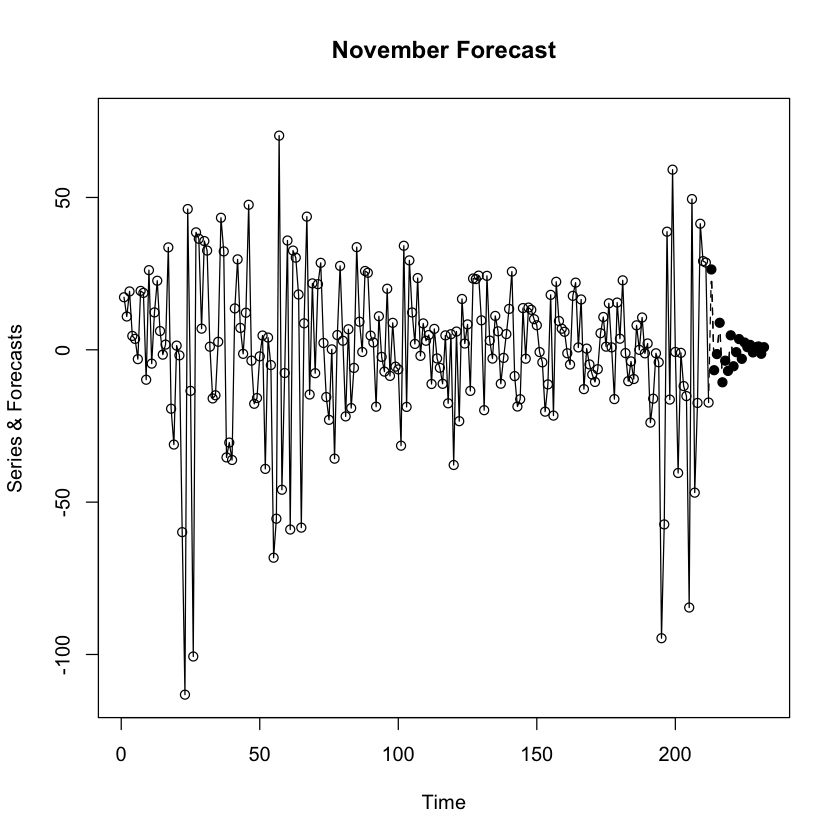

In [4]:
#plot the forecasts
result = plot(model,n.ahead=20,ylab='Series & Forecasts',col=NULL,
              pch=19,main = "November Forecast")

In [5]:
#Show differece of forecasts and actual data in a table 
forecast=result$pred
diff = result$pred - actual
prediction <- predict(series,20)
# cbind(actual,forecast,diff,result)

Warning message in `-.default`(result$pred, actual):
“longer object length is not a multiple of shorter object length”

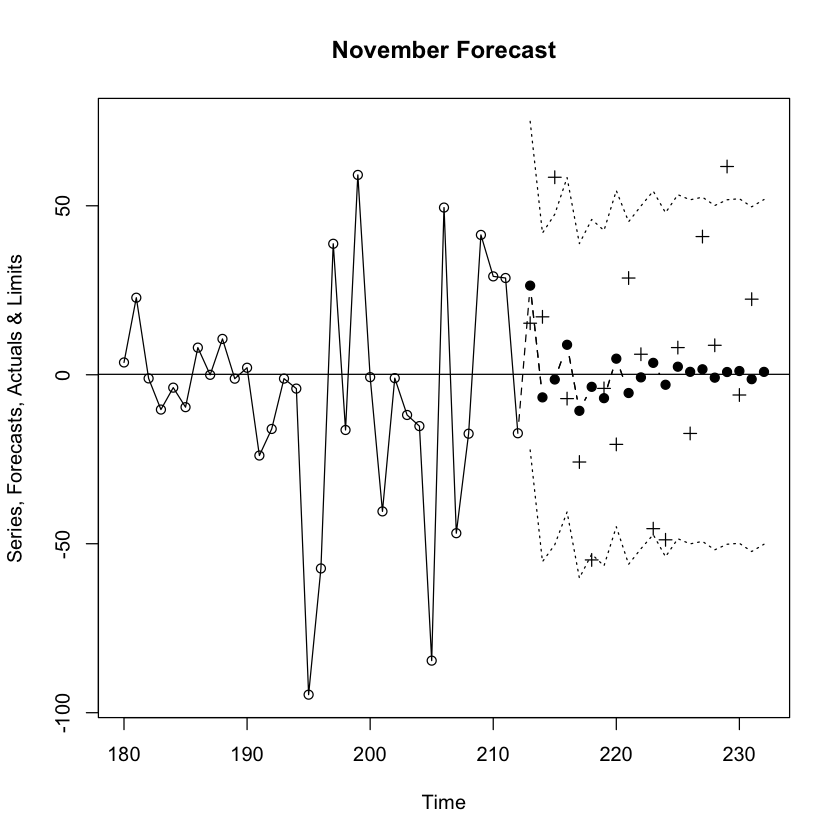

In [6]:
# plot forecasts with actual data
plot(model,n1=180,n.ahead=20,ylab='Series, Forecasts, Actuals & Limits', pch=19,
     main = "November Forecast")
points(x=seq(213,231),y=actual,pch=3)
abline(h=mean(series))

In the above graph, all black dots are actual values of S&P index in the given day, all plus signs are our predicted values, and two lines are our 95% confident level. We see that among 20 data points, there are 2 points go over the boundary. This certainly shows a limitation for our model. However, considering the fact that the stock market is very volatile these days, and we are only feeding our model with the data points from 10 months, we think that it is acceptable. Therefore, this concludes our forecasting process